# 1. Nhập dữ liệu ✅

In [5]:
import pandas as pd
import matplotlib.pylab as plt

In [102]:
raw_filename = "https://raw.githubusercontent.com/Cornunicorncrazy/supermarket_data/main/Supmarket_X.csv"
headers = ["Store", "Date", "Weekly_Sales", "Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment"]
df = pd.read_csv(raw_filename, names=headers, header=0)

pd.set_option('display.max_columns',None, 'display.max_rows', None)

# Mô tả dữ liệu ✅

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Nhận xét về data:
- Số hiệu của cửa hàng đang dưới dạng INT
- Dtype của Date đang là object, chưa phải là date time.
- Holiday flag có value là 0, 1 
- Các data dạng số khác chưa được chuẩn hóa
- Data không có null value

| Tên Cột | Ý Nghĩa |
|--------|---------|
| `Store` | Số hiệu của cửa hàng. |
| `Date` | Thời gian ghi nhận số liệu (theo tuần). |
| `Weekly_Sales` | Tổng doanh thu (theo tuần) |
| `Holiday_Flag` | ... |
| `Temperature` | Nhiệt độ (theo độ F) ... |
| `Fuel_Price` | Giá nhiên liệu ... |
| `CPI` | Chỉ số tiêu dùng CPI ... |
| `Unemployment` | Tỷ lệ thất nghiệp ... |

# 3. Kiểm tra giá trị NULL ✅

In [37]:
df.isnull().sum()

Store              0
Date               0
Weekly_Sales       0
Holiday_Flag       0
Temperature (F)    0
Fuel_Price         0
CPI                0
Unemployment       0
dtype: int64

Kiểm tra cho thấy, dataset không có giá trị NULL

# 4. Kiểm tra Data format ✅

In [45]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [ ]:
# Đổi lại định dạng của cột Date từ object về datetime64[ns]
df[["Date"]] = df[["Date"]].astype("datetime64[ns]")

In [51]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

# 5. Data Standardization and normalization ✅

In [133]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,0.422508,-1.088529,0.351567,0.134027
1,1,12-02-2010,1641957.44,1,0.384562,-1.118454,0.353367,0.134027
2,1,19-02-2010,1611968.17,0,0.398742,-1.160848,0.353947,0.134027
3,1,26-02-2010,1409727.59,0,0.465648,-1.102244,0.354323,0.134027
4,1,05-03-2010,1554806.68,0,0.464350,-1.022444,0.354700,0.134027
5,1,12-03-2010,1439541.59,0,0.577092,-0.970075,0.355076,0.134027
6,1,19-03-2010,1472515.79,0,0.545037,-0.903990,0.353039,0.134027
7,1,26-03-2010,1404429.92,0,0.513781,-0.889027,0.350600,0.134027
8,1,02-04-2010,1594968.28,0,0.621829,-0.905237,0.348161,-0.038128
9,1,09-04-2010,1545418.53,0,0.657679,-0.841646,0.345722,-0.038128


In [99]:
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for math plotting
%matplotlib inline

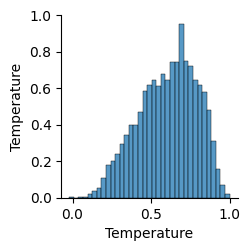

In [127]:
data = df[['Temperature']]
sns.pairplot(data)
plt.show()

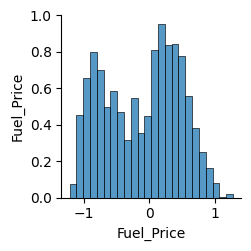

In [126]:
data = df[['Fuel_Price']]
sns.pairplot(data)
plt.show()

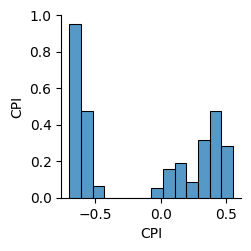

In [125]:
data = df[['CPI']]
sns.pairplot(data)
plt.show()

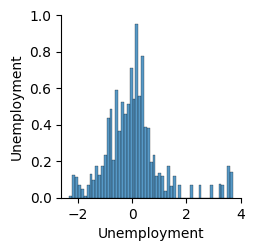

In [124]:
data = df[['Unemployment']]
sns.pairplot(data)
plt.show()

Kết luận qua biểu đồ distribution:
- Temperature không nhiều outliers => có thể sử dụng MinMaXScaler
- Fuel Price, CPI, Unemployment không phải normal distribution, có nhiều outliers => nên sử dụng RobustScaler

In [112]:
df['Temperature'] = df['Temperature']/df['Temperature'].max()

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df[['Fuel_Price']] = scaler.fit_transform(df[['Fuel_Price']])
df[['CPI']] = scaler.fit_transform(df[['CPI']])
df[['Unemployment']] = scaler.fit_transform(df[['Unemployment']])

In [113]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,0.422508,-1.088529,0.351567,0.134027
1,1,12-02-2010,1641957.44,1,0.384562,-1.118454,0.353367,0.134027
2,1,19-02-2010,1611968.17,0,0.398742,-1.160848,0.353947,0.134027
3,1,26-02-2010,1409727.59,0,0.465648,-1.102244,0.354323,0.134027
4,1,05-03-2010,1554806.68,0,0.464350,-1.022444,0.354700,0.134027


<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins </p>


<h3>Example of Binning Data In Pandas</h3>


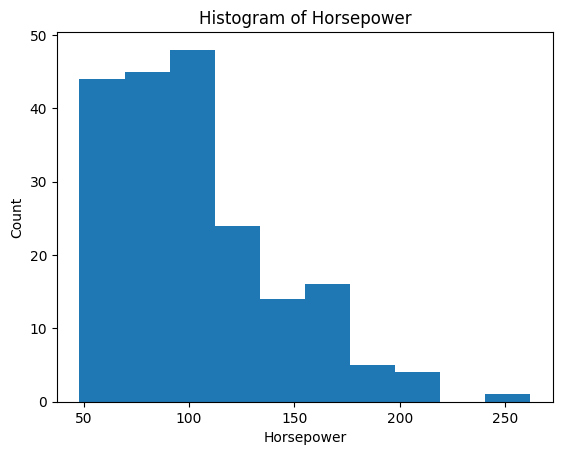

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# Chuyển đổi giá trị về numeric, nếu có '?', thì chuyển thành NaN
df["horsepower"] = pd.to_numeric(df["horsepower"], errors='coerce')

# Xoá các dòng có NaN (nếu muốn vẽ histogram chuẩn)
df = df.dropna(subset=["horsepower"])

# Vẽ biểu đồ histogram
plt.hist(df["horsepower"])
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Histogram of Horsepower")
plt.show()


<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of horsepower we want to set start_value=min(df["horsepower"]).</p>
<p>Since we want to include the maximum value of horsepower we want to set end_value=max(df["horsepower"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated=4.</p>


We build a bin array, with a minimum value to a maximum value, with bandwidth calculated above. The bins will be values used to determine when one bin ends and another begins.


In [53]:
min(df["horsepower"])

48

In [54]:
max(df["horsepower"])

262

In [56]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

 We set group  names:


In [57]:
group_names = ['Low', 'Medium', 'High']

 We apply the function "cut" the determine what each value of "df['horsepower']" belongs to. 


In [62]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Lets see the number of vehicles in each bin.


In [63]:
df["horsepower-binned"].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64